In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
# Prepare dataset
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
    
dataset = DiabetesDataset('diabetes.csv')
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=0)

In [3]:
# Define Model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.activate = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.activate(self.linear1(x))
        x = self.activate(self.linear2(x))
        x = torch.sigmoid(self.linear3(x))
        return x
    
model = Model()

In [4]:
# construct loss and optimizer
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [5]:
epoch_list = []
loss_list = []

In [6]:
# Training cycle
for epoch in range(100):
    for i, data in enumerate(train_loader, 0):
        # 1. Prepare data
        inputs, labels = data
        # 2. Forward
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
#         print(epoch, i, loss.item())
        
        epoch_list.append(epoch)
        loss_list.append(loss.item())
    
        # 3. Backward
        optimizer.zero_grad()
        loss.backward()
        # 4. Update
        optimizer.step()

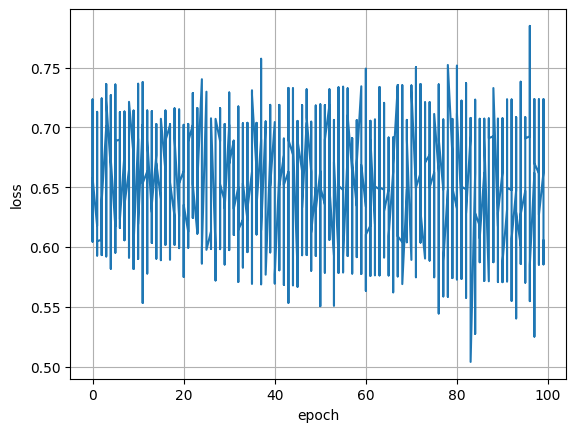

In [7]:
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.show()